In [96]:
#!unzip credit_test.zip
#!unzip credit_train.zip

In [97]:
import pandas as pd

In [98]:
df_train = pd.read_csv("credit_train.csv")
print(df_train.shape)
df_train.head()

(100000, 19)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


Описание полей:
* Loan ID: уникальный идентификатор кредита;
* Customer ID: уникальный идентификатор клиента;
* Loan Status: категориальный признак - кредит погашен ("Fully Paid") или не погашен ("Charged Off");
* Current Loan Amount: размер кредита;
* Term: срок кредита;
* Credit Score: кредитный рейтинг - число от 0 до 800;
* Years in current job: стаж на текущем месте работы;
* Home Ownership: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
* Annual Income: годовой доход;
* Purpose: цель кредита;
* Monthly Debt: размер ежемесячного платежа по текущим кредитам;
* Years of Credit History: количество лет кредитной истории;
* Months since last delinquent: количество месяцев с последнего нарушения условий кредита;
* Number of Open Accounts: количество открытых кредитных карт;
* Number of Credit Problems: количество кредитных проблем;
* Current Credit Balance: суммарный текущий долг;
* Maximum Open Credit: максимальный кредитный лимит из всех источников;
* Bankruptcies: количество банкротств;
* Tax Liens: количество нарушений налогового законодательства.




In [99]:
df_train.drop(columns=['Loan ID', 'Customer ID'], inplace=True)

In [100]:
df_train.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [101]:
df_train.duplicated().sum()

10215

In [102]:
df_train.drop_duplicates(inplace=True)

In [103]:
df_train.duplicated().sum()

0

In [104]:
df_train.shape

(89785, 17)

In [105]:
df_train['Credit Score'].mean()

1130.8305984624315

In [106]:
df_train['Credit Score'].value_counts()

747.0     1825
740.0     1746
746.0     1742
741.0     1732
742.0     1723
          ... 
6070.0       1
5960.0       1
5860.0       1
5890.0       1
6050.0       1
Name: Credit Score, Length: 324, dtype: int64

In [107]:
df_train['Credit Score'] = df_train['Credit Score'].map(lambda x: x / 10 if x >= 1000 else x)

In [108]:
df_train['Credit Score'].value_counts()

747.0    1876
740.0    1843
741.0    1819
746.0    1818
742.0    1807
         ... 
590.0       7
586.0       7
593.0       7
589.0       6
592.0       5
Name: Credit Score, Length: 167, dtype: int64

In [109]:
df_train['Credit Score'].mean()

718.5794764338605

In [110]:
df_train['Annual Income'].mean()

1375894.3876909572

In [111]:
df_train['Years in current job'].mode()

0    10+ years
Name: Years in current job, dtype: object

In [112]:
df_train['Months since last delinquent'].mean()

34.97587338351669

In [113]:
df_train['Maximum Open Credit'].mean()

775656.5049953777

In [114]:
df_train['Bankruptcies'].mode()

0    0.0
Name: Bankruptcies, dtype: float64

In [115]:
df_train['Tax Liens'].mode()

0    0.0
Name: Tax Liens, dtype: float64

In [116]:
df_train.fillna({
    'Credit Score': round(df_train['Credit Score'].mean()),
    'Annual Income': round(df_train['Annual Income'].mean()),
    'Years in current job': df_train['Years in current job'].mode()[0],
    'Months since last delinquent': round(df_train['Months since last delinquent'].mean()),
    'Maximum Open Credit': round(df_train['Maximum Open Credit'].mean()),
    'Bankruptcies': df_train['Bankruptcies'].mode()[0],
    'Tax Liens': df_train['Tax Liens'].mode()[0],
}, inplace=True)

In [117]:
df_train.isna().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [118]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.978500e+04,89785.000000,8.978500e+04,89785.000000,89785.000000,89785.000000,89785.000000,89785.000000,8.978500e+04,8.978500e+04,89785.000000,89785.000000
mean,1.306089e+07,718.669188,1.375894e+06,18396.906410,18.248642,34.988862,11.123250,0.164983,2.940351e+05,7.756565e+05,0.115287,0.028602
std,3.329556e+07,24.947545,9.799392e+05,12145.282372,7.034607,14.953379,4.998884,0.478010,3.722277e+05,8.803419e+06,0.347591,0.255095
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,713.000000,9.379350e+05,10157.400000,13.500000,35.000000,8.000000,0.000000,1.129360e+05,2.770680e+05,0.000000,0.000000
50%,3.138740e+05,719.000000,1.375894e+06,16140.310000,17.000000,35.000000,10.000000,0.000000,2.097220e+05,4.727140e+05,0.000000,0.000000
75%,5.323780e+05,737.000000,1.495680e+06,23918.910000,21.700000,35.000000,14.000000,0.000000,3.675170e+05,7.914500e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [119]:
import seaborn as sns

<Axes: xlabel='Credit Score', ylabel='Count'>

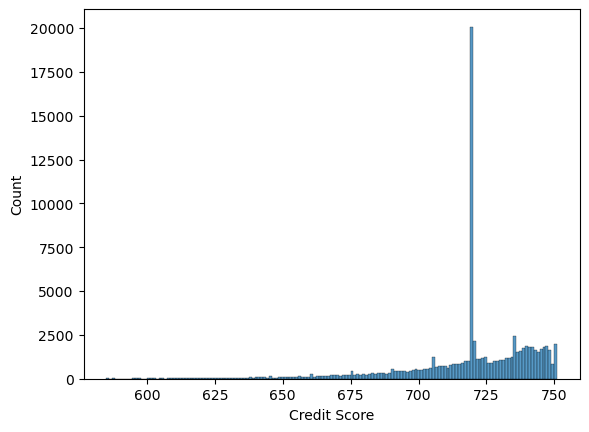

In [120]:
sns.histplot(df_train['Credit Score'])

<Axes: xlabel='Loan Status', ylabel='Count'>

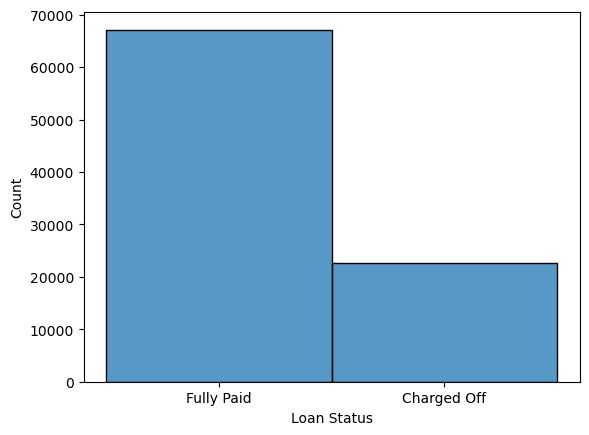

In [121]:
sns.histplot(df_train['Loan Status'])

<Axes: xlabel='Home Ownership', ylabel='Count'>

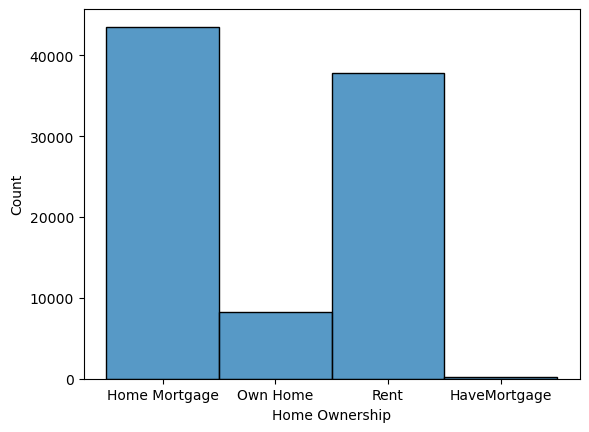

In [122]:
sns.histplot(df_train['Home Ownership'])

In [123]:
df_train['Home Ownership'] = df_train['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

<Axes: xlabel='Home Ownership', ylabel='Count'>

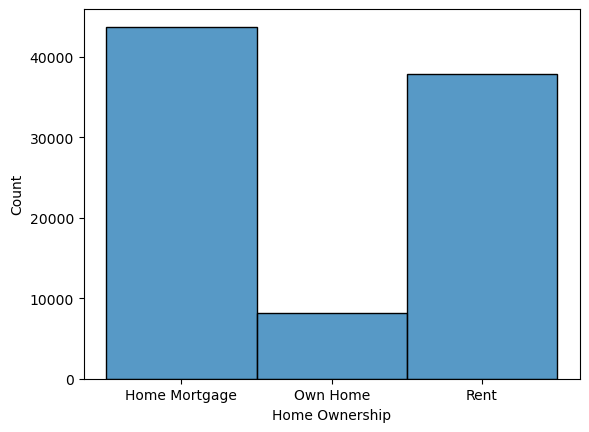

In [124]:
sns.histplot(df_train['Home Ownership'])

<Axes: xlabel='Term', ylabel='Count'>

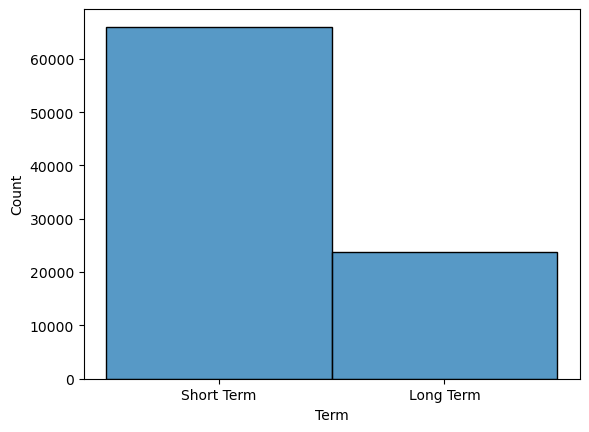

In [125]:
sns.histplot(df_train['Term'])

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   89785 non-null  object 
 1   Current Loan Amount           89785 non-null  int64  
 2   Term                          89785 non-null  object 
 3   Credit Score                  89785 non-null  float64
 4   Annual Income                 89785 non-null  float64
 5   Years in current job          89785 non-null  object 
 6   Home Ownership                89785 non-null  object 
 7   Purpose                       89785 non-null  object 
 8   Monthly Debt                  89785 non-null  float64
 9   Years of Credit History       89785 non-null  float64
 10  Months since last delinquent  89785 non-null  float64
 11  Number of Open Accounts       89785 non-null  int64  
 12  Number of Credit Problems     89785 non-null  int64  
 13  C

In [127]:
from sklearn.preprocessing import LabelEncoder

target_objects = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

le = LabelEncoder()
for target in target_objects:
    df_train[target] = le.fit_transform(df_train[target])

<Axes: >

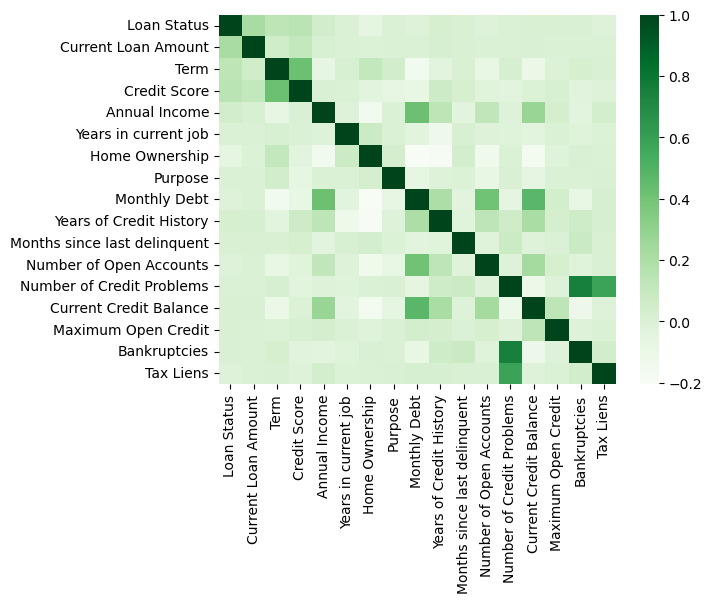

In [128]:
sns.heatmap(df_train.corr(),  cmap='Greens')

In [129]:
df_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412,1,709.0,1167493.0,8,0,5,5214.74,17.2,35.0,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,719.0,1375894.0,1,0,3,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2231892.0,8,1,3,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,1,347666,0,721.0,806949.0,3,1,3,8741.90,12.0,35.0,9,0,256329,386958.0,0.0,0.0
4,1,176220,1,719.0,1375894.0,5,2,3,20639.70,6.1,35.0,15,0,253460,427174.0,0.0,0.0


In [130]:
from sklearn.preprocessing import StandardScaler

target_scaler = ['Current Loan Amount', 'Credit Score', 'Annual Income',
                 'Years in current job', 'Home Ownership', 'Purpose	',
                 'Monthly Debt', 'Years of Credit History',
                 'Months since last delinquent', 'Number of Open Accounts',
                 'Number of Credit Problems', 'Current Credit Balance',
                 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.drop(columns='Loan Status'), target_scaler))

In [131]:
df_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.378896,0.599921,-0.387583,-2.126688e-01,1.378078,-0.982709,0.539219,-1.085379,-0.149070,0.000745,-1.024884,1.746869,-0.176896,-0.040770,2.545284,-0.112122
1,-0.384395,0.599921,0.013260,-3.112293e-07,-0.835884,-0.982709,-0.350340,1.226744,0.405335,-1.804877,4.776443,-0.345147,-0.172098,0.008534,-0.331675,-0.112122
2,2.611147,0.599921,0.895116,8.735261e-01,1.378078,0.068817,-0.350340,0.889537,-0.476027,-0.400505,1.375665,1.746869,0.010641,-0.002904,-0.331675,-0.112122
3,-0.381832,-1.666887,0.093429,-5.805957e-01,-0.203323,0.068817,-0.350340,-0.794964,-0.888277,0.000745,-0.424747,-0.345147,-0.101299,-0.044153,-0.331675,-0.112122
4,-0.386981,0.599921,0.013260,-3.112293e-07,0.429237,1.120343,-0.350340,0.184665,-1.726992,0.000745,0.775527,-0.345147,-0.109007,-0.039585,-0.331675,-0.112122


In [132]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [133]:
x_train, x_test, y_train, y_test = train_test_split(df_train_scaled, df_train['Loan Status'])

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga', 'lbfgs', 'liblinear']
}

# Создаем модель логистической регрессии
lr = LogisticRegression(max_iter=1000)

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Создаем модель RidgeClassifier
rc = RidgeClassifier()

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=rc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _ch

Лучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7507462021651
              precision    recall  f1-score   support

           0       0.56      0.04      0.08      5649
           1       0.75      0.99      0.86     16798

    accuracy                           0.75     22447
   macro avg       0.66      0.52      0.47     22447
weighted avg       0.71      0.75      0.66     22447

[[  245  5404]
 [  191 16607]]


In [153]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Создаем модель RidgeClassifier
rc = RidgeClassifier()

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=rc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


Лучшие параметры: {'alpha': 10, 'solver': 'lsqr'}
Accuracy: 0.7492760725263955
              precision    recall  f1-score   support

           0       0.61      0.01      0.02      5649
           1       0.75      1.00      0.86     16798

    accuracy                           0.75     22447
   macro avg       0.68      0.50      0.44     22447
weighted avg       0.72      0.75      0.65     22447

[[   57  5592]
 [   36 16762]]


In [136]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)
pred = sgdc.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Accuracy: 0.7483405354835836
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5649
           1       0.75      1.00      0.86     16798

    accuracy                           0.75     22447
   macro avg       0.37      0.50      0.43     22447
weighted avg       0.56      0.75      0.64     22447

[[    0  5649]
 [    0 16798]]


C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем модель DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7427273132267118
              precision    recall  f1-score   support

           0       0.41      0.05      0.09      5649
           1       0.75      0.98      0.85     16798

    accuracy                           0.74     22447
   macro avg       0.58      0.51      0.47     22447
weighted avg       0.67      0.74      0.66     22447

[[  291  5358]
 [  417 16381]]


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем модель RandomForestClassifier
rfc = RandomForestClassifier()

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем параметры для перебора
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Создаем модель XGBClassifier с включением GPU
xgb = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

# GridSearch для поиска лучших параметров
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
pred = best_model.predict(x_test)

# Вывод метрик
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l1', 'elasticnet'], 'alpha': [0.00001, 0.0001, 0.001, 0.01]}

sgdc = SGDClassifier()
gscv = GridSearchCV(sgdc, param_grid)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

sgdc_best = SGDClassifier(penalty=gscv.best_params_['penalty'], alpha=gscv.best_params_['alpha'])
sgdc_best.fit(x_train, y_train)
pred = sgdc_best.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

{'alpha': 0.01, 'penalty': 'l1'}
Accuracy: 0.7483405354835836
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5649
           1       0.75      1.00      0.86     16798

    accuracy                           0.75     22447
   macro avg       0.37      0.50      0.43     22447
weighted avg       0.56      0.75      0.64     22447

[[    0  5649]
 [    0 16798]]


C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
df_test = pd.read_csv("credit_test.csv")
df_test.drop(columns=['Customer ID'], inplace=True)

In [142]:
df_test.isna().sum()

Loan ID                            0
Current Loan Amount                0
Term                               0
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      22
Tax Liens                          1
dtype: int64

In [143]:
df_test.fillna({
    'Credit Score': round(df_test['Credit Score'].mean()),
    'Annual Income': round(df_test['Annual Income'].mean()),
    'Months since last delinquent': round(df_test['Months since last delinquent'].mean()),
    'Maximum Open Credit': round(df_test['Maximum Open Credit'].mean()),
    'Bankruptcies': df_test['Bankruptcies'].mode()[0],
    'Tax Liens': df_test['Tax Liens'].mode()[0],
}, inplace=True)

In [144]:
df_test.duplicated().sum()

0

In [145]:
df_test.isna().sum()

Loan ID                           0
Current Loan Amount               0
Term                              0
Credit Score                      0
Annual Income                     0
Years in current job            427
Home Ownership                    0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
dtype: int64

In [146]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Current Loan Amount           10000 non-null  int64  
 2   Term                          10000 non-null  object 
 3   Credit Score                  10000 non-null  float64
 4   Annual Income                 10000 non-null  float64
 5   Years in current job          9573 non-null   object 
 6   Home Ownership                10000 non-null  object 
 7   Purpose                       10000 non-null  object 
 8   Monthly Debt                  10000 non-null  float64
 9   Years of Credit History       10000 non-null  float64
 10  Months since last delinquent  10000 non-null  float64
 11  Number of Open Accounts       10000 non-null  int64  
 12  Number of Credit Problems     10000 non-null  int64  
 13  Cu

In [147]:
loan_id = df_test['Loan ID']
df_test.drop(columns=['Loan ID'], inplace=True)

target_objects = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

le = LabelEncoder()
for target in target_objects:
    df_test[target] = le.fit_transform(df_test[target])

scaler = StandardScaler()
df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test, target_scaler))

preds = sgdc_best.predict(df_test_scaled)

In [148]:
df_test_submit = pd.DataFrame({"Loan ID": loan_id.values, 'Loan Status': preds})
df_test_submit

,Loan ID,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,1
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1
2,f7744d01-894b-49c3-8777-fc6431a2cff1,1
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,1
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,1
...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,1
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,1
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,1
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,1


In [149]:
df_test_submit['Loan Status'].replace({1: "Fully Paid", 0: "Charged Off"}, inplace=True)

In [150]:
df_test_submit.to_csv("submission.csv", index=False)